# <center> LAB 2: Linear Classification: Logistic Regression<br> <small>Réda DEHAK<br> December 9th, 2020</small> </center>

The goal of this lab is :
    - Test the logistic regression on classification problems
    - Evaluate performances statistics.


In [70]:
%pylab
%matplotlib inline
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

Using matplotlib backend: MacOSX
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/Users/ibrahim/opt/anaconda3/lib/python3.9/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['gradient', 'cm']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


## Part 1: Logistic Regression 
### Import Data

We will use the Wine dataset from UCI. These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of thirteen constituents found in each of the three types of wines.

# Loading and Plotting Data
 
First, we will use only two features from the data set: alcohol and ash (We can plot the solution in 2D space). The labels are supplied as an array of data with values from 1 to 3, but at first, we want a simple binary regression problem with a yes or no answer.  

We filter the data set, reducing it to only include wines with labels 1 or 2.  

In [71]:
%pylab
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

data = pd.read_csv('data.txt')

reduced = data[data['class'] <= 2]
X = reduced[['alcohol', 'ash']].to_numpy()
y = label_binarize(reduced['class'].to_numpy(), classes=[1, 2])[:,0]

Using matplotlib backend: MacOSX
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [72]:
print(data)

     class  alcohol  malic_acid   ash  alcalinity  magnesium  total_phenols  \
0        1    14.23        1.71  2.43        15.6        127           2.80   
1        1    13.20        1.78  2.14        11.2        100           2.65   
2        1    13.16        2.36  2.67        18.6        101           2.80   
3        1    14.37        1.95  2.50        16.8        113           3.85   
4        1    13.24        2.59  2.87        21.0        118           2.80   
..     ...      ...         ...   ...         ...        ...            ...   
173      3    13.71        5.65  2.45        20.5         95           1.68   
174      3    13.40        3.91  2.48        23.0        102           1.80   
175      3    13.27        4.28  2.26        20.0        120           1.59   
176      3    13.17        2.59  2.37        20.0        120           1.65   
177      3    14.13        4.10  2.74        24.5         96           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyan

In [73]:
# split data into train and validation set
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25, random_state = 42)
print('train:', len(Xtrain), 'test:', len(Xtest))

train: 97 test: 33


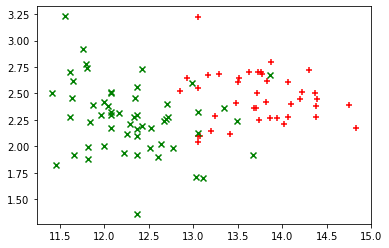

In [74]:
MARKERS = ['+', 'x', '.']
COLORS = ['red', 'green', 'blue']

def plot_points(xy, labels):
    
    for i, label in enumerate(set(labels)):
        points = np.array([xy[j,:] for j in range(len(xy)) if labels[j] == label])
        marker = MARKERS[i % len(MARKERS)]
        color = COLORS[i % len(COLORS)]
        plt.scatter(points[:,0], points[:,1], marker=marker, color=color)

plot_points(Xtrain, ytrain)

We can see that we can plot line that could divide the two colored points with a small amount of error.

# Logistic Regression

To implement logistic regression, we need to define the cost function $J(\theta)$, and compute the partial derivatives of $J(\theta)$. As we have seen previously:

$$
J(\theta) =-\frac{1}{N}\sum_{i=1}^{N}y^{i}\log(f_\theta(x^{i}))+(1-y^{i})\log(1-f_\theta(x^{i}))
$$

where $f_\theta(x)$ is the logistic function

$$
f_\theta(x) = \frac{1}{1 + e^{-\theta^Tx}}
$$

- Compute the partiel derivatives of $J(\theta)$ and write the two functions:
    - cost(theta, X, y) which compute the value of $J(\theta)$
    - gradient(theta, X, y) which compute the value of the gradient of $J(\theta)$

In [75]:
def sigmoid(theta, X):
    #print("sig",theta.T.shape,X.shape)
    return 1/(1+np.exp(-1*theta.T @ X))

def cost(theta, X, y):
    N=X.shape[1]
    #print("cost",theta.shape,X.shape)
    J= (-1/N) * (y @ np.log(sigmoid(theta,X))+(1-y)@np.log(1-sigmoid(theta,X)))
    return J

def gradient(theta, X, y):
    N=X.shape[1]
    #print("grad",theta.shape,X.shape)
    #G=X@y-X@sigmoid(theta,X)
    G=(-1/N)*(X@y-X@sigmoid(theta,X))
    return G

- Using the function scipy.optimize.fmin_tnc which performs a gradient descent algorithm, write a function Train(x, y) which compute $\theta$ that minimize $J(\theta)$

In [76]:
from scipy.optimize import fmin_tnc  

def train(X, y):
    X = np.insert(X, 0, np.ones(len(X)), axis=1)
    theta = np.zeros(X.shape[1])
    theta=theta.reshape(theta.shape[0],1)
    result = fmin_tnc(func=cost,x0=theta,fprime=gradient,args=[X.T,y])
    return result

- compute the value of the best $\theta$

In [77]:
W,itr,res=train(Xtrain,ytrain)
print(W)

[60.75109019 -4.11135537 -2.9373876 ]


  NIT   NF   F                       GTG
    0    1  6.931471805599453E-01   4.51418817E-01
    1    3  6.879398176443684E-01   9.68924528E-04
tnc: fscale = 32.1259
    2    5  6.773443201004968E-01   6.87489271E-01
tnc: fscale = 1.20605
    3    7  6.691299352359296E-01   1.14252555E-03
tnc: fscale = 29.5847
    4    9  6.690963486005840E-01   1.73845464E-03
tnc: stepmx = 1000
    5   11  4.652072252898440E-01   1.21824730E-03
    6   13  4.570148523078882E-01   5.12881798E-01
tnc: fscale = 1.39634
    7   15  4.501676559985504E-01   3.21364478E-04
tnc: fscale = 55.7829
    8   17  4.501525139088486E-01   8.26714647E-04
    9   21  2.483882435548232E-01   1.05696686E-02
   10   26  2.326176212178437E-01   1.93210974E-03
   11   28  2.325472453334275E-01   3.97073520E-04
   12   30  2.324285812160709E-01   1.07630319E-03
   13   32  2.321935985497343E-01   5.96968353E-04
   14   34  2.280042858105396E-01   1.08435696E-03
   15   36  2.277377652771377E-01   1.91583782E-03
   16   38  2.

In [78]:
def predict(theta, X):
    X = np.insert(X, 0, np.ones(len(X)), axis=1)
    return (sigmoid(theta, X.T) >= 0.5).astype(int)


predict(W.T,Xtrain)

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1])

- Plot the boundary and checks that it is linear?

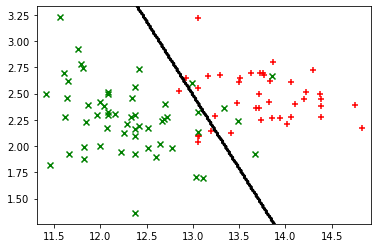

In [79]:
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap

def predict(theta, X):
    X = np.insert(X, 0, np.ones(len(X)), axis=1)
    return (sigmoid(theta, X.T) >= 0.5).astype(int)

def plot_boundary(X, pred):
    
    x_min, x_max = X[:,0].min() - .1, X[:,0].max() + .1
    y_min, y_max = X[:,1].min() - .1, X[:,1].max() + .1
    
    xs, ys = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )

    xys = np.column_stack([xs.ravel(), ys.ravel()])
    zs = pred(xys).reshape(xs.shape)
    plt.contour(xs, ys, zs, colors='black')
  
plot_boundary(Xtrain, lambda x: predict(W.reshape(3,1), x))
plot_points(Xtrain, ytrain)

- Using sklearn.metrics, compute the confusion matrix

In [80]:
import sklearn.metrics as metrics
#from sklearn.metrics import confusion_matrix
cm=metrics.confusion_matrix(y_true=ytrain, y_pred=predict(W.reshape(3,1),Xtrain).T)
tp,fp,fn,tn=cm.ravel()
print(cm)
print(tp,tn)

[[36  5]
 [ 5 51]]
36 51


In [81]:
cm_test=metrics.confusion_matrix(y_true=ytest, y_pred=predict(W.reshape(3,1),Xtest).T)
print(cm_test)

[[18  0]
 [ 0 15]]


- Compute all performance metrics that has been defined during the lecture

In [82]:
mdl_acc=tp+tn/(cm.sum())
mdl_npv=tn/(fn+tn)
mdl_spc=tn/(fp+tn)
mdl_tpr=tp/(tp+fn)
mdl_fpr=fp/(fp+tn)
mdl_ppv=tp/(tp+fp)
mdl_fdr=fp/(tp+fp)


- Plot the ROC curve of your classifier

- Plot the Precision-Recall curve of your classifier

- How can we obtain a quadratic boundary? check it and plot the boundary?

(array([17.55821902,  0.82293573,  5.77615856, -0.09586725, -0.98662972,
        0.87764407]), 100, 3)


  NIT   NF   F                       GTG
    0    1  6.931471805599453E-01   1.72296477E+01
    1    7  2.353876217032878E-01   4.34135585E+00
    2   14  2.230567752949062E-01   5.33200687E-02
    3   17  2.230398936332336E-01   5.82220603E-04
tnc: fscale = 41.4435
    4   21  2.226669370088777E-01   5.31854067E-04
    5   25  2.226491134404821E-01   6.69334399E-04
    6   29  2.225529703050025E-01   1.13636774E-03
    7   33  2.225502682066402E-01   6.53174350E-06
    8   37  2.225437737950752E-01   1.01103856E-04
    9   41  2.225408921505445E-01   4.81518820E-05
   10   45  2.224757568835538E-01   9.35448641E-06
   11   49  2.224296968737273E-01   3.11314735E-05
   12   52  2.224295103357045E-01   3.50221934E-05
   13   56  2.224235714202276E-01   4.97768823E-05
   14   60  2.223549398718132E-01   5.78161372E-04
tnc: stepmx = 1000
   15   64  2.213995345111968E-01   2.87356414E-02
   16   67  2.212738260514840E-01   4.14458588E-04
   17   71  2.206933464628615E-01   1.65711172E-02


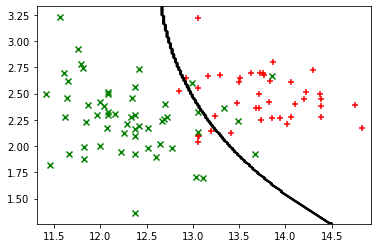

In [84]:
from sklearn.preprocessing import PolynomialFeatures

def transform(x):
    #return PolynomialFeatures(2).fit_transform(x)
    a=x[:,0]
    b=x[:,1]
    return np.stack((a,b,a**2,a*b,b**2),axis=0).T
    #return np.vstack((...))
    
W = train(transform(Xtrain), ytrain)
print(W)

plot_points(Xtrain, ytrain)
plot_boundary(Xtrain, lambda x: predict(W[0], transform(x)))


In [85]:
transform(Xtrain)

array([[ 13.5   ,   2.61  , 182.25  ,  35.235 ,   6.8121],
       [ 12.37  ,   1.92  , 153.0169,  23.7504,   3.6864],
       [ 11.41  ,   2.5   , 130.1881,  28.525 ,   6.25  ],
       [ 12.08  ,   2.3   , 145.9264,  27.784 ,   5.29  ],
       [ 13.63  ,   2.7   , 185.7769,  36.801 ,   7.29  ],
       [ 11.84  ,   2.23  , 140.1856,  26.4032,   4.9729],
       [ 13.71  ,   2.36  , 187.9641,  32.3556,   5.5696],
       [ 13.05  ,   2.1   , 170.3025,  27.405 ,   4.41  ],
       [ 12.37  ,   2.56  , 153.0169,  31.6672,   6.5536],
       [ 11.81  ,   2.74  , 139.4761,  32.3594,   7.5076],
       [ 13.73  ,   2.7   , 188.5129,  37.071 ,   7.29  ],
       [ 13.67  ,   1.92  , 186.8689,  26.2464,   3.6864],
       [ 11.87  ,   2.39  , 140.8969,  28.3693,   5.7121],
       [ 13.86  ,   2.27  , 192.0996,  31.4622,   5.1529],
       [ 13.76  ,   2.7   , 189.3376,  37.152 ,   7.29  ],
       [ 13.11  ,   1.7   , 171.8721,  22.287 ,   2.89  ],
       [ 13.05  ,   3.22  , 170.3025,  42.021 ,  10.3684

- Compute all performance metrics of this new classifier

In [61]:
cm=metrics.confusion_matrix(y_true=ytrain, y_pred=predict(W[0],transform(Xtrain)).T)
print(cm)
cm_test=metrics.confusion_matrix(y_true=ytest, y_pred=predict(W[0],transform(Xtest)).T)
print(cm_test)

[[36  5]
 [ 5 51]]
[[18  0]
 [ 0 15]]


# Multinomial Logistic Regression

The next step is something more interesting: we use a similar set of two features from the data set (this time alcohol and flavanoids), but with all three labels instead of two.

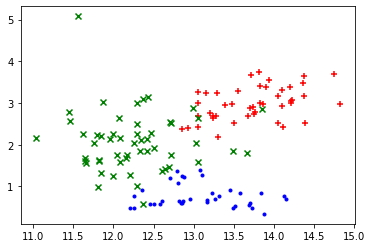

In [62]:
X = data[['alcohol', 'flavanoids']].to_numpy()
y = data[['class']].to_numpy()
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25, random_state = 42)
ytrain = label_binarize(ytrain, classes = [1, 2, 3])
plot_points(Xtrain, ytrain.argmax(axis=1))

In [63]:
#print(Xtrain.shape)
#print(ytrain.shape)
#k=0
#x=Xtrain
#y=ytrain
#x=np.insert(x, 0, np.ones(len(x)), axis=1)
#print(x)
#W=np.zeros((x.shape[1], y.shape[1]))
#print(W[0].shape)
#sft=np.exp(W[k].T@x)/np.stack(w.T@x,axis=1)
#print(np.exp(W.T@x.T)/[np.exp(W[k].T@x.T) for k in range(len(W))])





The plotted data points again suggest some obvious linear boundaries between the three classes.

We can solve this problem as three one-vs-all problems, and re-use all the previous code. In this part, we will try another solution inspired from softmax function known as softmax regression (See C.Bishop, "Pattern Recognition and Machine Learning", 2006, Springer).

$$
SoftMax_\Theta(x, k) = \frac{e^{\theta_k^Tx}}{\sum\limits_{c=1}^K e^{\theta_c^Tx}}
$$

The cost function is defined as follows:

$$
J(\Theta) =-\frac{1}{N}\sum_{i=1}^{N}\sum_{k=1}^3\left[y_k^{i}\log\left(SoftMax_\Theta\left(x^{i}, k\right)\right)\right]
$$

- Propose a solution using the SoftMax function and test it with linear and quadratic separator? 

In [64]:
def softmax(w, x):
    return np.exp(w.T@x)/np.sum(np.exp(w.T@x),axis=0)

def cost(w, x, y):
    w=w.reshape(x.shape[1],len(w)//x.shape[1])
    return (-1/len(x))*np.sum(y@np.log(softmax(w,x.T)))

def grad(w, x, y):
    w=w.reshape(x.shape[1],len(w)//x.shape[1])
    return (-1)*x.T@(y-softmax(w,x.T).T)

def train(X, y):
    X = np.insert(X, 0, np.ones(len(X)), axis=1)
    theta = np.zeros((X.shape[1], y.shape[1]))
    result = fmin_tnc(func=cost,x0=theta,fprime=grad,args=[X,y])
    
    return result[0].reshape((X.shape[1], -1))

W1 = train(Xtrain,ytrain)
print(W1)
print(np.sum(W1,axis=1))

W2 = train(Xtrain,ytrain)[[2,1,0]]
#print(W2)

[[-0.3691271   0.48652491 -0.11739912]
 [ 0.02502271 -0.03859942  0.01357532]
 [ 0.02191181  0.00978501 -0.03170049]]
[-1.31098010e-06 -1.38721397e-06 -3.67187512e-06]


  NIT   NF   F                       GTG
    0    1  1.461154343928586E+02   2.33748939E+04
tnc: fscale = 0.00654071
    1   40  1.460916399882489E+02   2.20604256E+04
tnc: |fn-fn-1] = 3.39481e-14 -> convergence
    2   93  1.460916399882489E+02   2.20604256E+04
tnc: Converged (|f_n-f_(n-1)| ~= 0)
  NIT   NF   F                       GTG
    0    1  1.461154343928586E+02   2.33748939E+04
tnc: fscale = 0.00654071
    1   40  1.460916399882489E+02   2.20604256E+04
tnc: |fn-fn-1] = 3.39481e-14 -> convergence
    2   93  1.460916399882489E+02   2.20604256E+04
tnc: Converged (|f_n-f_(n-1)| ~= 0)


[[0.30387108 0.35565292 0.34047601]
 [0.30403308 0.35538776 0.34057915]
 [0.30419508 0.35512269 0.34068223]
 ...
 [0.37334156 0.31989995 0.30675849]
 [0.37352063 0.31964435 0.30683502]
 [0.37369967 0.31938886 0.30691147]]


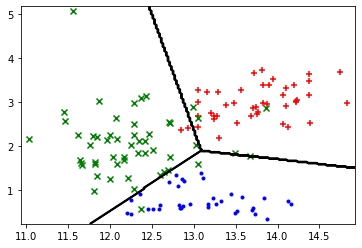

In [65]:
def predict_multi(x, w):
    x = np.insert(x, 0, np.ones(len(x)), axis=1)
    P=softmax(w,x.T)
    print(P.T)
    return np.argmax(P,axis=0)

plot_points(Xtrain, ytrain.argmax(axis=1))
plot_boundary(Xtrain, lambda x: predict_multi(x, W1))

  NIT   NF   F                       GTG
    0    1  1.461154343928586E+02   3.84292144E+06
tnc: fscale = 0.000510116
    1   37  1.461077712755482E+02   3.61103959E+06
tnc: |fn-fn-1] = 0 -> convergence
    2   88  1.461077712755482E+02   3.61103959E+06
tnc: Converged (|f_n-f_(n-1)| ~= 0)


[[0.30686453 0.34379585 0.34933962]
 [0.30692094 0.34360023 0.34947884]
 [0.30697767 0.34340388 0.34961845]
 ...
 [0.36518227 0.29336194 0.34145579]
 [0.36545908 0.29316732 0.3413736 ]
 [0.36573635 0.29297201 0.34129164]]


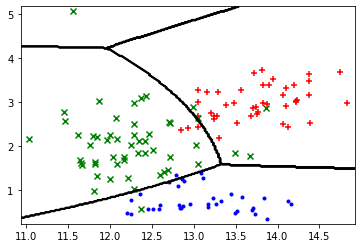

In [66]:
Wquad=train(transform(Xtrain),ytrain)
plot_points(Xtrain, ytrain.argmax(axis=1))
#print(Wquad)
plot_boundary(Xtrain, lambda x: predict_multi(transform(x),Wquad))
#plot_boundary(Xtrain, lambda x: predict_multi(x, W2))

- Compute the accuracy, the precision and the recall of these classifiers

- Conclude?

# Regularization

Next, we want to include all the features from the data set.

In [67]:
X = data.drop('class', 1).as_matrix()
y = data.as_matrix(columns=['class'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25, random_state = 42)
ytrain = label_binarize(ytrain, classes = [1, 2, 3])

/var/folders/kq/4phtjsxn40794zp8lvjfsccw0000gn/T/ipykernel_15520/3613769551.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data.drop('class', 1).as_matrix()


AttributeError: 'DataFrame' object has no attribute 'as_matrix'

Because we are now significantly increasing the number of features, we apply regularisation  as part of new cost and gradient functions.  As we have seen with linear regression, regularization prevents overfitting, a situation where a large number of features allows the classifier to fit the training set *too* exactly, meaning that it fails to generalize well and perform accurately on data it hasn't yet seen.

To avoid this problem, we add an additional term to the cost function

$$
J(\Theta) =-\frac{1}{N}\sum_{i=1}^{N}\sum_{k=1}^3\left[y_k^{i}\log\left(SoftMax_\Theta\left(x^{i}, k\right)\right)\right] + \frac{\lambda}{2}\left(\left\|\theta_1\right\|_2^2+\left\|\theta_2\right\|_2^2+\left\|\theta_3\right\|_2^2\right)
$$

- Compute the partiel derivatives of $J(\theta)$ and define the update formula of the gradient descent algorithm?

LaTeX:𝛼2

$$ \nabla J(\Theta)=\frac{\sigma J}{\sigma \Theta 1}
$$


- Write a function that minimize $J(\theta)$ and test it on the WINE dataset?

- Compare with non regularized version?

- Conclude?